In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 45.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 21.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

In [30]:
# Prova a caricare il file con diverse configurazioni
# Sostituisci 'apple_stock.csv' con il percorso del file
df = pd.read_csv('Datasets/apple_stock.csv', sep=',', header=0)

# Stampa le prime righe per verificare che il file sia stato letto correttamente
print("Prime righe del dataset:")
print(df.head())

# Stampa le colonne disponibili
print("Colonne del dataset:", df.columns)

Prime righe del dataset:
         Date   Price    Open    High     Low     Vol. Change %
0  03/27/2024  173.31  170.30  173.58  170.14   59.11M    2.12%
1  03/26/2024  169.71  170.01  171.41  169.65   57.22M   -0.67%
2  03/25/2024  170.85  170.37  171.94  169.46   54.21M   -0.83%
3  03/22/2024  172.28  171.76  173.05  170.06   71.16M    0.53%
4  03/21/2024  171.37  177.05  177.49  170.84  106.18M   -4.09%
Colonne del dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

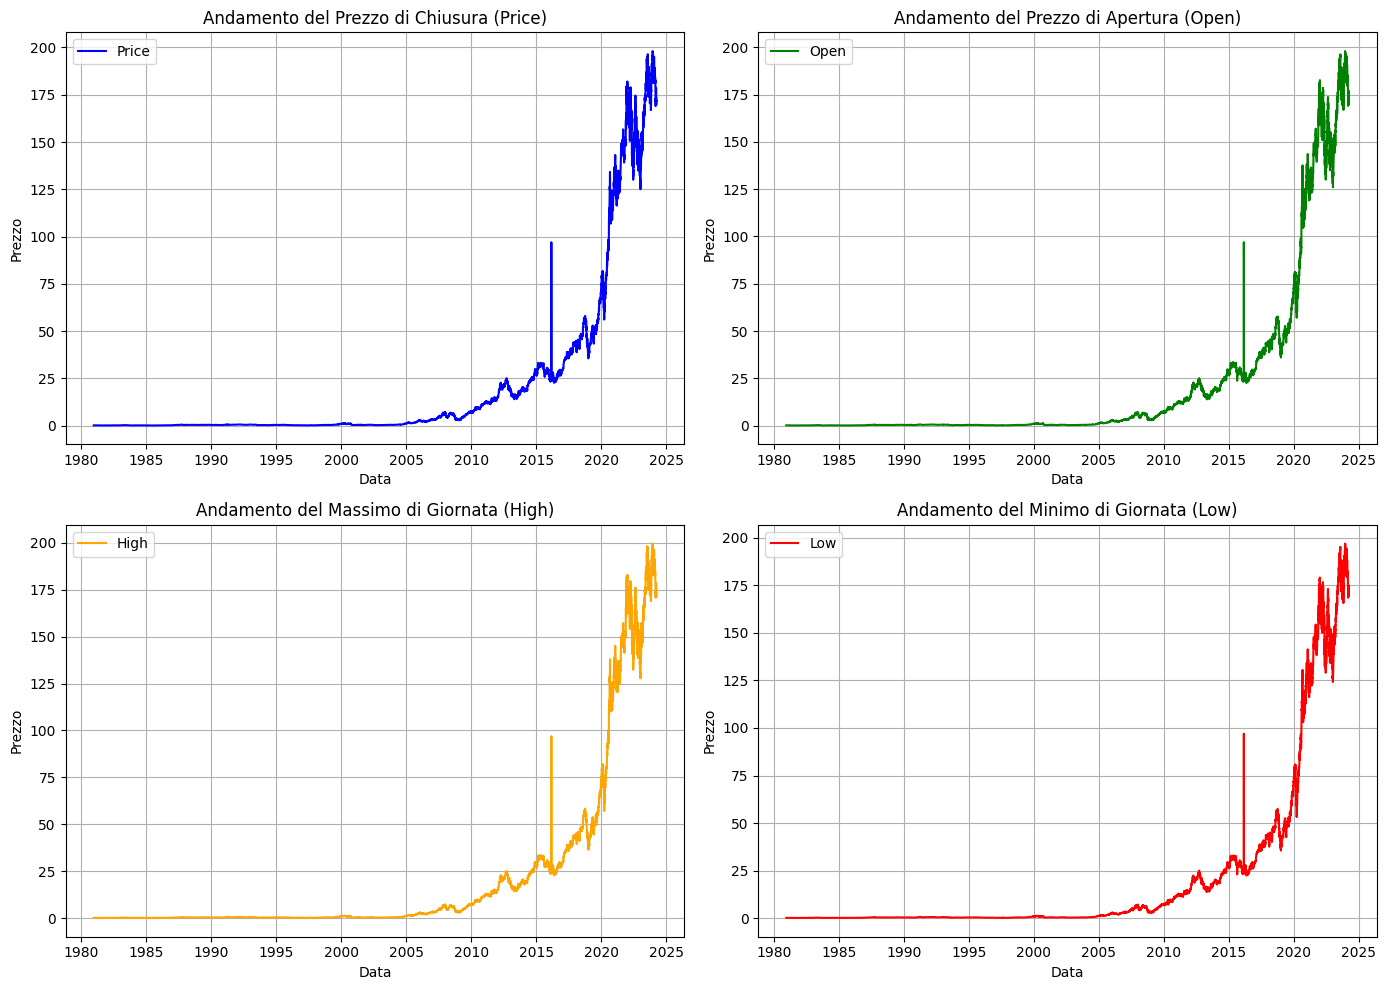

In [5]:
# Creazione dei grafici
plt.figure(figsize=(14, 10))

# Grafico dell'andamento del prezzo di chiusura (Price)
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Price'], label='Price', color='blue')
plt.title('Andamento del Prezzo di Chiusura (Price)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del prezzo di apertura (Open)
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Open'], label='Open', color='green')
plt.title('Andamento del Prezzo di Apertura (Open)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del massimo di giornata (High)
plt.subplot(2, 2, 3)
plt.plot(df.index, df['High'], label='High', color='orange')
plt.title('Andamento del Massimo di Giornata (High)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del minimo di giornata (Low)
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.title('Andamento del Minimo di Giornata (Low)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Migliora il layout e mostra i grafici
plt.tight_layout()
plt.show()

In [27]:
# Filtro il dataset per il periodo 2015-2018
df_filtered = df[(df.index >= '2015-01-01') & (df.index <= '2018-12-31')]

# Trova la data con il massimo valore del prezzo di chiusura (Price) nel periodo filtrato
max_price_date = df_filtered['Price'].idxmax()
max_price_value = df_filtered['Price'].max()

print(f"Il picco massimo del prezzo tra il 2015 e il 2018 si verifica il {max_price_date} con un valore di {max_price_value}.")

Il picco massimo del prezzo tra il 2015 e il 2018 si verifica il 2016-02-27 00:00:00 con un valore di 96.95.


E' un picco insolito: 02/27/2016,96.95,96.95,96.95,96.95,,300.12%. E' un errore sicuro, infatti le altre fonti non riportano questo valore. I giornali non indicano nessun fatto rilevante collegato a questa data, e come ultima prova il 27 febbraio 2016 era sabato, quindi non era un giorno di negoziazione. Scacco matto.

Provvediamo a cancellare il picco...


In [32]:
# Cancellare la riga con la data '2016-02-27'
df = df.drop('2016-02-27', axis=0)
print("ok")

ok


Rifacciamo i grafici

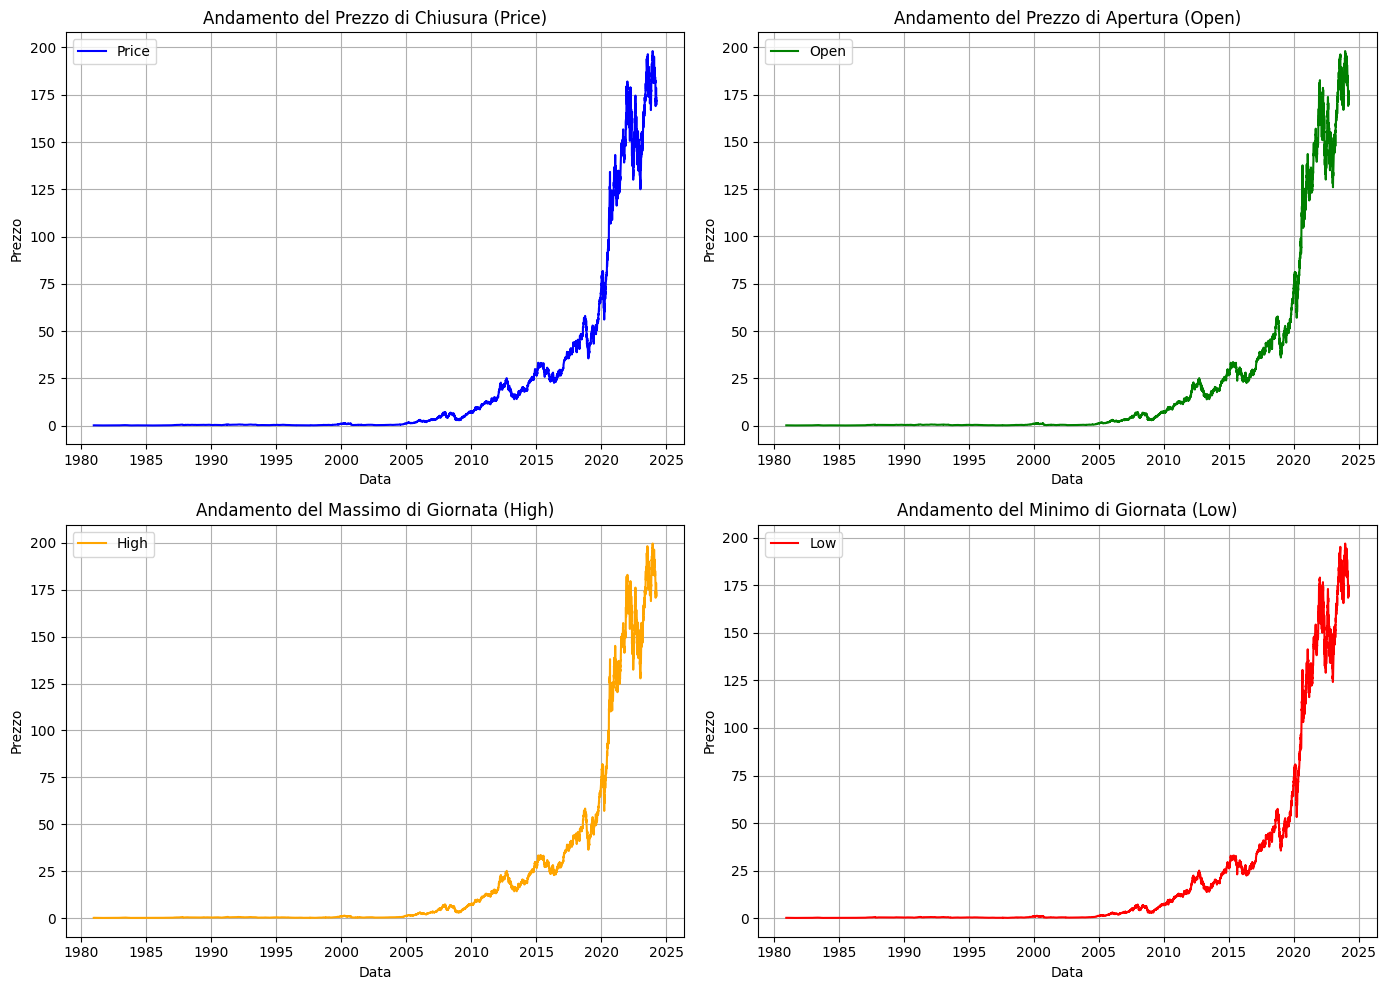

In [33]:
# Creazione dei grafici
plt.figure(figsize=(14, 10))

# Grafico dell'andamento del prezzo di chiusura (Price)
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Price'], label='Price', color='blue')
plt.title('Andamento del Prezzo di Chiusura (Price)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del prezzo di apertura (Open)
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Open'], label='Open', color='green')
plt.title('Andamento del Prezzo di Apertura (Open)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del massimo di giornata (High)
plt.subplot(2, 2, 3)
plt.plot(df.index, df['High'], label='High', color='orange')
plt.title('Andamento del Massimo di Giornata (High)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del minimo di giornata (Low)
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.title('Andamento del Minimo di Giornata (Low)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Migliora il layout e mostra i grafici
plt.tight_layout()
plt.show()

Ora si che va bene 👍🏼

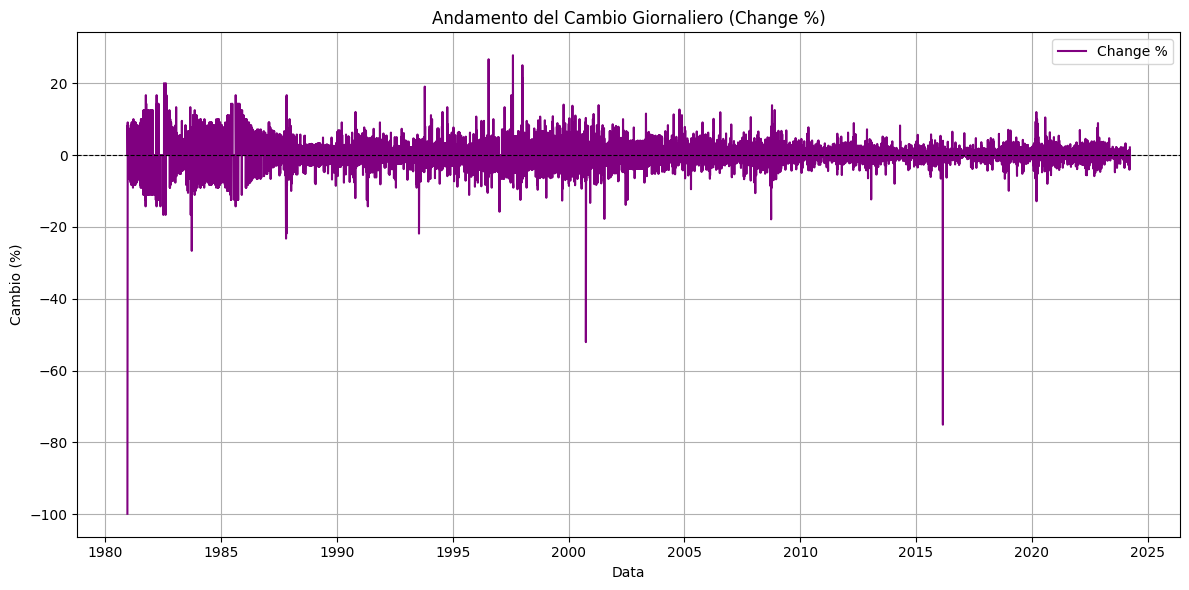

In [34]:
# Pulizia della colonna 'Change %': Rimuovi il simbolo '%' e converti in float
df['Change'] = df['Change %'].str.replace('%', '').astype(float)

# Creazione del grafico per l'andamento del cambio giornaliero
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Change'], label='Change %', color='purple')
plt.title('Andamento del Cambio Giornaliero (Change %)')
plt.xlabel('Data')
plt.ylabel('Cambio (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linea per zero
plt.grid()
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

Mi puzzano molto anche questi cambi giornalieri più bassi del -30%. Se non fosse un errore, sarebbe un dato molto importante. Ma non penso siano reali. Un -40%/-50% sarebbe stata una tragedia. Vediamo quando si verificano questi picchi...

In [35]:
# Filtra i giorni con Change inferiore a -30%
low_change_days = df[df['Change'] < -30]

# Stampa a schermo le righe con Change < -30%
print("Giorni con un cambio inferiore a -30%:")
print(low_change_days)

Giorni con un cambio inferiore a -30%:
            Price   Open   High    Low     Vol. Change %  Change
Date                                                            
1980-12-12   0.13   0.13   0.13   0.13  469.03M  -99.88%  -99.88
2000-09-29   0.46   0.50   0.52   0.45    7.43B  -52.08%  -52.08
2016-02-29  24.17  24.21  24.56  24.16  140.87M  -75.07%  -75.07


1) Il -99.88% del 12 dicembre 1980 corrisponde a errore certo. Infatti quella data corrisponde all'IPO della Apple, e la variazione tra 0.13 e 0.13 è 0% casomai, non -99.88%. E poi non ho trovato corrispondenza sull'internet (Yahoo! Finance non lo riporta).

2) La variazione tra 0.50(Open) e 0.46(Close) non è -52.08%. Quindi è un errore certo.

3) La variazione tra 24.21(Open) e 24.17(Close) non è -75.07%. Quindi è un errore certo.


In [46]:
# Cancellare la riga con la data '1980-12-12'
df = df.drop('1980-12-12', axis=0)
print("ok")

ok


In [44]:
# Calcola la variazione percentuale (Price - Open) / Open * 100 per le date 2000-09-29 e 2016-02-29
dates_to_check = ['2000-09-29', '2016-02-29']

# Seleziona le righe per le date specificate
selected_rows = df.loc[dates_to_check, ['Open', 'Price']]

# Calcola la variazione percentuale di prezzo
df.loc[dates_to_check, 'Change'] = ((selected_rows['Price'] - selected_rows['Open']) / selected_rows['Open']) * 100

# Arrotonda la colonna 'Price Change %' a 2 decimali
df['Change'] = df['Change'].round(2)

# Stampa i risultati
print("Variazione percentuale di prezzo per le date selezionate:")
print(df.loc[dates_to_check, ['Open', 'Price', 'Change']])

Variazione percentuale di prezzo per le date selezionate:
             Open  Price  Change
Date                            
2000-09-29   0.50   0.46   -8.00
2016-02-29  24.21  24.17   -0.17


Ricalcoliamo i grafici per le variazioni giornaliere.

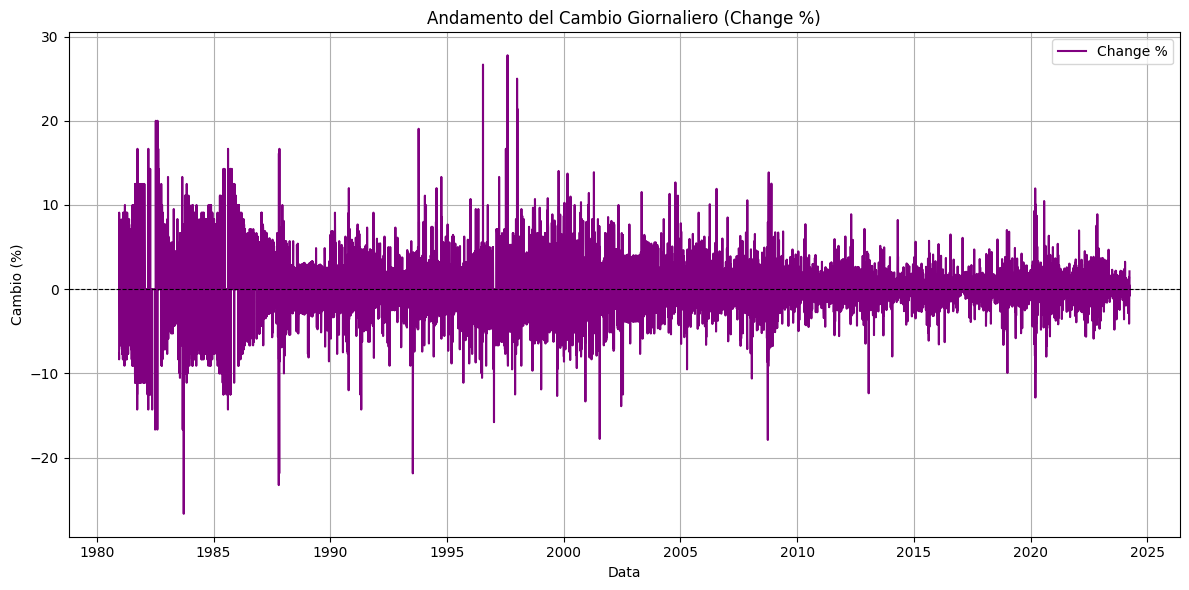

In [47]:
# Creazione del grafico per l'andamento del cambio giornaliero
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Change'], label='Change %', color='purple')
plt.title('Andamento del Cambio Giornaliero (Change %)')
plt.xlabel('Data')
plt.ylabel('Cambio (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linea per zero
plt.grid()
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

Andamento del volume giornaliero.

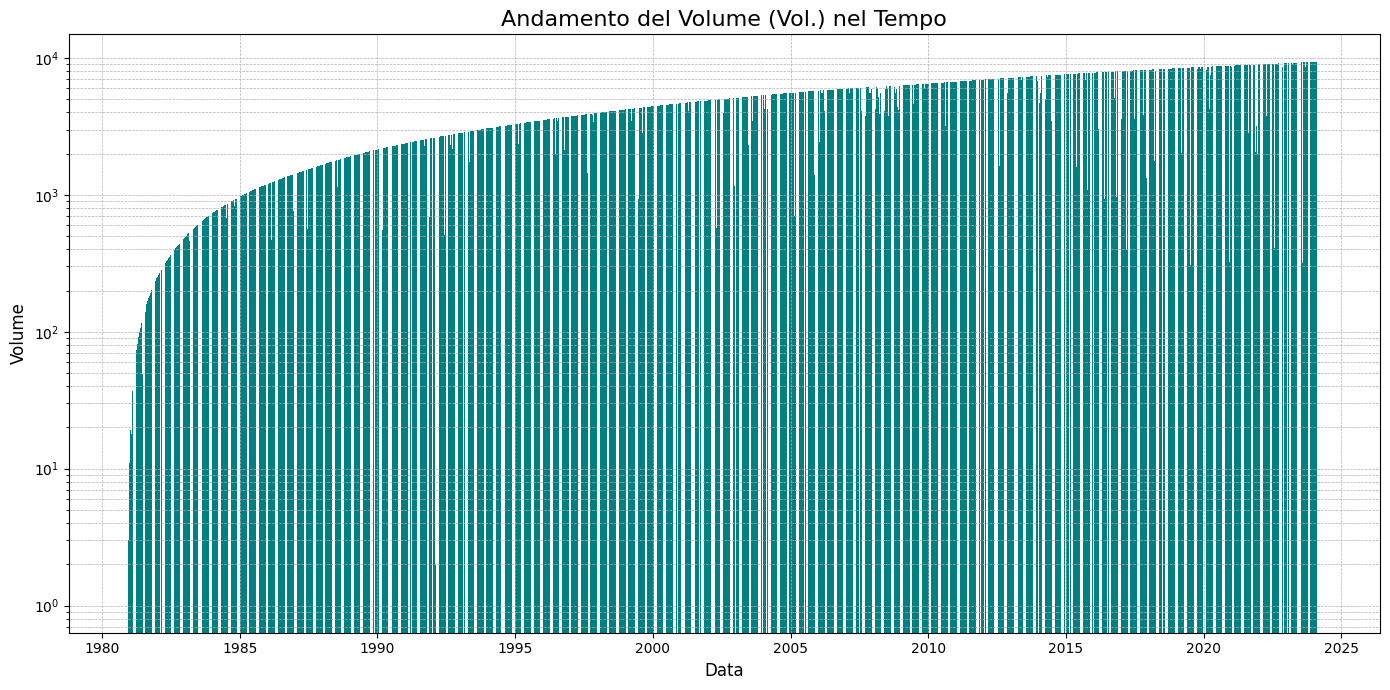

In [52]:
# Creazione del grafico per l'andamento del volume
plt.figure(figsize=(14, 7))

# Grafico a barre per il volume
plt.bar(df.index, df['Vol.'], color='teal', width=1.0)

# Aggiungi titolo e etichette
plt.title('Andamento del Volume (Vol.) nel Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume', fontsize=12)

# Aggiungi la griglia per una migliore leggibilità
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Imposta una scala logaritmica sull'asse Y se necessario (utile per grandi differenze nei volumi)
plt.yscale('log')

# Mostra il grafico
plt.tight_layout()
plt.show()

### Decomposizione della serie temporale (utilizzando un periodo annuale)

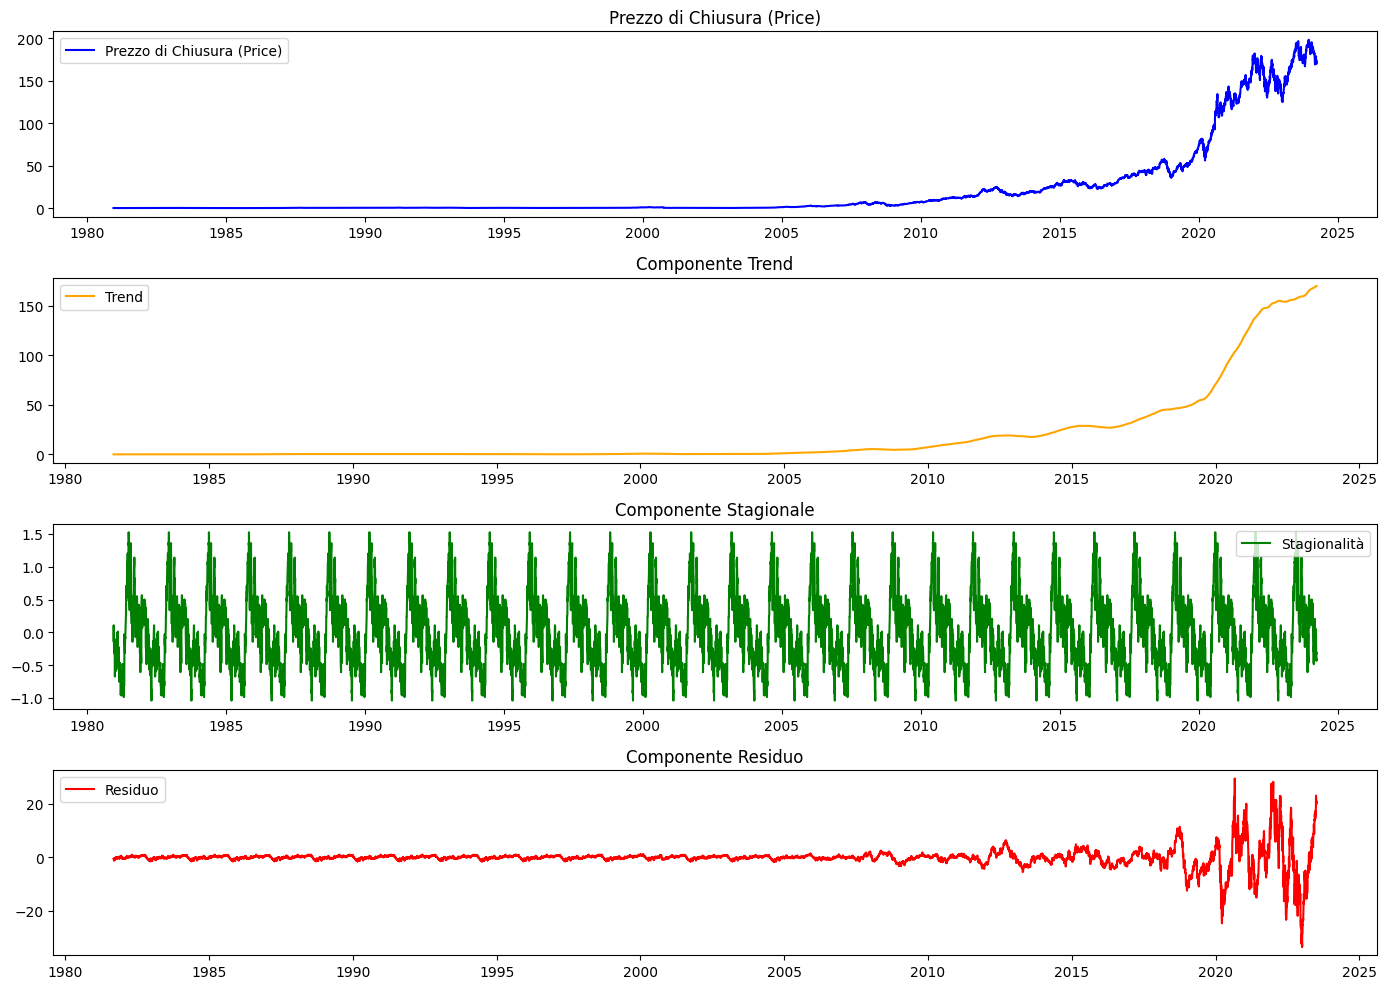

Componente stagionale (andamento stagionale annuale):
Date
1980-12-15   -0.130823
1980-12-16   -0.008736
1980-12-17    0.106751
1980-12-18    0.094468
1980-12-19   -0.048908
                ...   
1982-05-20   -0.133074
1982-05-21   -0.224226
1982-05-24   -0.337473
1982-05-25   -0.282088
1982-05-26   -0.167070
Name: seasonal, Length: 365, dtype: float64


In [53]:
# Seleziona solo la colonna 'Price' per l'analisi
price_data = df['Price']

# Decomposizione della serie temporale (utilizzando un periodo annuale)
decomposition = seasonal_decompose(price_data, model='additive', period=365)

# Visualizzazione della decomposizione
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(price_data, label='Prezzo di Chiusura (Price)', color='blue')
plt.legend(loc='best')
plt.title('Prezzo di Chiusura (Price)')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Componente Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Stagionalità', color='green')
plt.legend(loc='best')
plt.title('Componente Stagionale')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuo', color='red')
plt.legend(loc='best')
plt.title('Componente Residuo')

plt.tight_layout()
plt.show()

# Analisi visiva della componente stagionale
print("Componente stagionale (andamento stagionale annuale):")
print(decomposition.seasonal.head(365))  # Stampa i primi 365 giorni di stagione

ARIMA (AutoRegressive Integrated Moving Average)

L’ARIMA è un modello molto utile per le serie temporali stazionarie. Funziona bene per i dati che non hanno una forte stagionalità, ma possono avere tendenze.

Previsione con ARIMA per il Prezzo di Chiusura con Augmented Dickey-Fuller (ADF) Test.


L’Augmented Dickey-Fuller (ADF) Test è un test statistico utilizzato per determinare se una serie temporale è stazionaria. Se la serie non è stazionaria, potrebbe essere necessario differenziarla prima di applicare un modello ARIMA.

Il test ADF restituisce diversi valori, ma i più rilevanti per determinare la stazionarietà sono:
	1.	Statistic Value: Il valore della statistica del test.
	2.	P-value: Se il p-value è inferiore a una soglia (ad esempio, 0.05), possiamo rifiutare l’ipotesi nulla (H0), che afferma che la serie ha una radice unitaria (non è stazionaria). In tal caso, possiamo dire che la serie è stazionaria.
	3.	Critical Values: I valori critici del test per vari livelli di significatività (1%, 5%, 10%).

In [57]:
from statsmodels.tsa.stattools import adfuller
# Seleziona solo la colonna 'Price' (Prezzo di Chiusura)
price_data = df['Price']

# Applicazione del test ADF
adf_result = adfuller(price_data)

# Stampa i risultati
print("Risultati del test ADF:")
print(f"Statistic Value: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print(f"Number of Lags Used: {adf_result[2]}")
print(f"Number of Observations Used: {adf_result[3]}")
print(f"Critical Values: {adf_result[4]}")

Risultati del test ADF:
Statistic Value: 2.3921469724243742
P-value: 0.9990065659373312
Number of Lags Used: 39
Number of Observations Used: 10870
Critical Values: {'1%': np.float64(-3.430951733663523), '5%': np.float64(-2.861805932829006), '10%': np.float64(-2.5669115509123883)}


Risultati del Test ADF:

	1.	Statistic Value: 2.39
	
	Questo è il valore della statistica del test ADF. Il valore della statistica del test è positivo, ma per determinare se la serie è stazionaria, bisogna confrontarlo con i valori critici per vari livelli di significatività (1%, 5%, 10%). Poiché la statistica del test (2.39) è superiore ai valori critici a tutti i livelli di significatività, non possiamo rifiutare l’ipotesi nulla (che afferma che la serie ha una radice unitaria ed è quindi non stazionaria).

	2.	P-value: 0.999 

	Il p-value è estremamente alto (0.999), ben al di sopra della soglia comune di 0.05. Se il p-value è maggiore di 0.05, significa che non possiamo rifiutare l’ipotesi nulla, quindi la serie non è stazionaria.

	3.	Critical Values:

	•	1%: -3.431
	•	5%: -2.862
	•	10%: -2.567
	I valori critici sono i valori soglia che ci dicono a che punto possiamo rifiutare l’ipotesi nulla. Se la statistica del test è più bassa (più negativa) dei valori critici, possiamo rifiutare l’ipotesi nulla (serie stazionaria). Tuttavia, la tua statistica del test (2.39) è positiva e superiore ai valori critici, quindi non possiamo rifiutare l’ipotesi nulla e dobbiamo concludere che la serie non è stazionaria.

Interpretazione:

	•	Ipotesi nulla (H0): La serie ha una radice unitaria ed è non stazionaria.
	•	Ipotesi alternativa (H1): La serie è stazionaria.

Poiché la statistica del test è positiva e il p-value è molto alto, non possiamo rifiutare l’ipotesi nulla. Questo significa che la tua serie temporale non è stazionaria.

Poiché la serie non è stazionaria, è necessario rendere la serie stazionaria per applicare correttamente un modello ARIMA.

Differenziare la Serie: Possiamo provare a differenziare la serie (ad esempio, con price_data.diff()), e poi applicare di nuovo il test ADF per verificare se la serie è diventata stazionaria.

In [58]:
price_data_diff = price_data.diff().dropna()
adf_result_diff = adfuller(price_data_diff)
print(f"Statistic Value (Differenziata): {adf_result_diff[0]}")
print(f"P-value (Differenziata): {adf_result_diff[1]}")

Statistic Value (Differenziata): -18.220678290476854
P-value (Differenziata): 2.3802776521729337e-30


#### Statistic Value: -18.22
La statistica del test è molto negativa (-18.22), il che è un buon segno. Più negativa è la statistica, più forte è l’evidenza contro l’ipotesi nulla. In questo caso, il valore è significativamente più basso dei valori critici a 1%, 5% e 10%, quindi possiamo rifiutare l’ipotesi nulla (che afferma che la serie ha una radice unitaria ed è non stazionaria).

#### P-value: 2.38e-30
Il p-value è molto basso (2.38 × 10⁻³⁰), molto inferiore a 0.05. Un p-value così basso indica che possiamo rifiutare l’ipotesi nulla con alta certezza, suggerendo che la serie è stazionaria dopo la differenziazione.




La statistica del test è molto più bassa rispetto ai valori critici:

•	1%: -3.431

•	5%: -2.862

•	10%: -2.567

Poiché la statistica del test (-18.22) è molto inferiore ai valori critici, possiamo concludere che la serie è stazionaria dopo la differenziazione. Dopo aver differenziato la serie, la statistica del test è molto più negativa e il p-value è estremamente basso, il che significa che la serie è ora stazionaria. Possiamo quindi applicare un modello ARIMA alla serie differenziata, poiché ora soddisfa la condizione di stazionarietà.

Risultati del test ADF:
Statistic Value: 2.3921469724243742
P-value: 0.9990065659373312
Number of Lags Used: 39
Number of Observations Used: 10870
Critical Values: {'1%': np.float64(-3.430951733663523), '5%': np.float64(-2.861805932829006), '10%': np.float64(-2.5669115509123883)}


1. Statistic Value: 2.39
La statistica del test è positiva (2.39), ma per determinare se la serie è stazionaria, dobbiamo confrontarla con i valori critici (1%, 5%, 10%). Una statistica positiva è un’indicazione che l’ipotesi nulla (che la serie ha una radice unitaria e quindi non è stazionaria) non viene rifiutata.

2. P-value: 0.999
Il p-value è molto alto (0.999), molto maggiore di 0.05. Quando il p-value è così alto, non possiamo rifiutare l’ipotesi nulla. L’ipotesi nulla afferma che la serie non è stazionaria (ha una radice unitaria), quindi, in questo caso, la serie non è stazionaria.

3. Critical Values:

    •	1%: -3.431

    •	5%: -2.862 

    •	10%: -2.567

   La statistica del test (2.39) è molto superiore ai valori critici (ad esempio, -3.431 a livello di significatività 1%). Questo conferma che non possiamo rifiutare l’ipotesi nulla che la serie non sia stazionaria.

Conclusione: Poiché la statistica del test è positiva e il p-value è molto alto (0.999), non possiamo rifiutare l’ipotesi nulla. Questo significa che la serie non è stazionaria.

Non è ancora stazionaria. Applichiamo di nuovo il test ADF.

In [61]:
# Differenziazione della serie per rendere stazionaria
price_data_diff = price_data.diff().dropna()

# Applicazione del test ADF sulla serie differenziata
adf_result_diff = adfuller(price_data_diff)

# Stampa i risultati del test ADF sulla serie differenziata
print("Risultati del test ADF sulla serie differenziata:")
print(f"Statistic Value: {adf_result_diff[0]}")
print(f"P-value: {adf_result_diff[1]}")
print(f"Number of Lags Used: {adf_result_diff[2]}")
print(f"Number of Observations Used: {adf_result_diff[3]}")
print(f"Critical Values: {adf_result_diff[4]}")

Risultati del test ADF sulla serie differenziata:
Statistic Value: -18.220678290476854
P-value: 2.3802776521729337e-30
Number of Lags Used: 39
Number of Observations Used: 10869
Critical Values: {'1%': np.float64(-3.430951789038982), '5%': np.float64(-2.8618059572994015), '10%': np.float64(-2.566911563937937)}


1.	Statistic Value: -18.22
	La statistica del test è molto negativa (-18.22), il che è un segno molto positivo per la stazionarietà. Più la statistica è negativa, maggiore è la probabilità che la serie sia stazionaria.
	La statistica è significativamente inferiore ai valori critici, il che indica che possiamo rifiutare l’ipotesi nulla (che la serie non è stazionaria).

2.	P-value: 2.38e-30
    Il p-value è estremamente basso (2.38 × 10⁻³⁰), ben al di sotto del valore soglia di 0.05. Un p-value così basso indica che possiamo rifiutare l’ipotesi nulla con un alto livello di confidenza, quindi la serie è stazionaria.

3.	Critical Values:
	•	1%: -3.431
	•	5%: -2.862
	•	10%: -2.567
	La statistica del test (-18.22) è molto inferiore ai valori critici (ad esempio, -3.431 a livello di significatività 1%), il che conferma che possiamo rifiutare l’ipotesi nulla e concludere che la serie è stazionaria.


Poiché la statistica del test è significativamente più negativa dei valori critici e il p-value è estremamente basso, possiamo rifiutare l’ipotesi nulla che la serie abbia una radice unitaria (cioè che non sia stazionaria). Pertanto, la serie è stazionaria dopo la differenziazione.

In [62]:
#grafico prima e dopo mancante

I parametri di ARIMA:

1.	d (Differenziazione):
	
    Questo parametro dipende dal numero di differenziazioni effettuate sulla serie. Poiché abbiamo già applicato la differenziazione una volta per rendere la serie stazionaria, d = 1. Se la serie non è ancora stazionaria, potrebbe essere necessario differenziare una seconda volta (quindi d = 2).

2.	p (Ordine Autoregressivo):

	Questo parametro rappresenta il numero di lag nei dati che sono utilizzati per predire i valori futuri. Si individua osservando la Funzione di Autocorrelazione Parziale (PACF). In pratica, si cerca il primo lag significativo in PACF. Se la PACF si ferma subito dopo il primo lag, p = 1.

3.	q (Ordine Media Mobile):

	Questo parametro rappresenta il numero di lag negli errori passati utilizzati per predire i valori futuri. Si individua osservando la Funzione di Autocorrelazione (ACF). In pratica, si cerca il primo lag significativo in ACF. Se l’ACF si ferma subito dopo il primo lag, q = 1.


Passaggi per la Scelta dei Parametri p e q:

1.	Calcolare ACF e PACF:

	La ACF mostra la correlazione tra una serie e i suoi valori passati, mentre la PACF mostra la correlazione parziale dopo aver rimosso l’effetto delle correlazioni intermedie.

2.	Osservare i grafici:

	ACF: Cerca il primo valore significativo che esce dalla banda di confidenza per determinare q.
	PACF: Cerca il primo valore significativo che esce dalla banda di confidenza per determinare p.

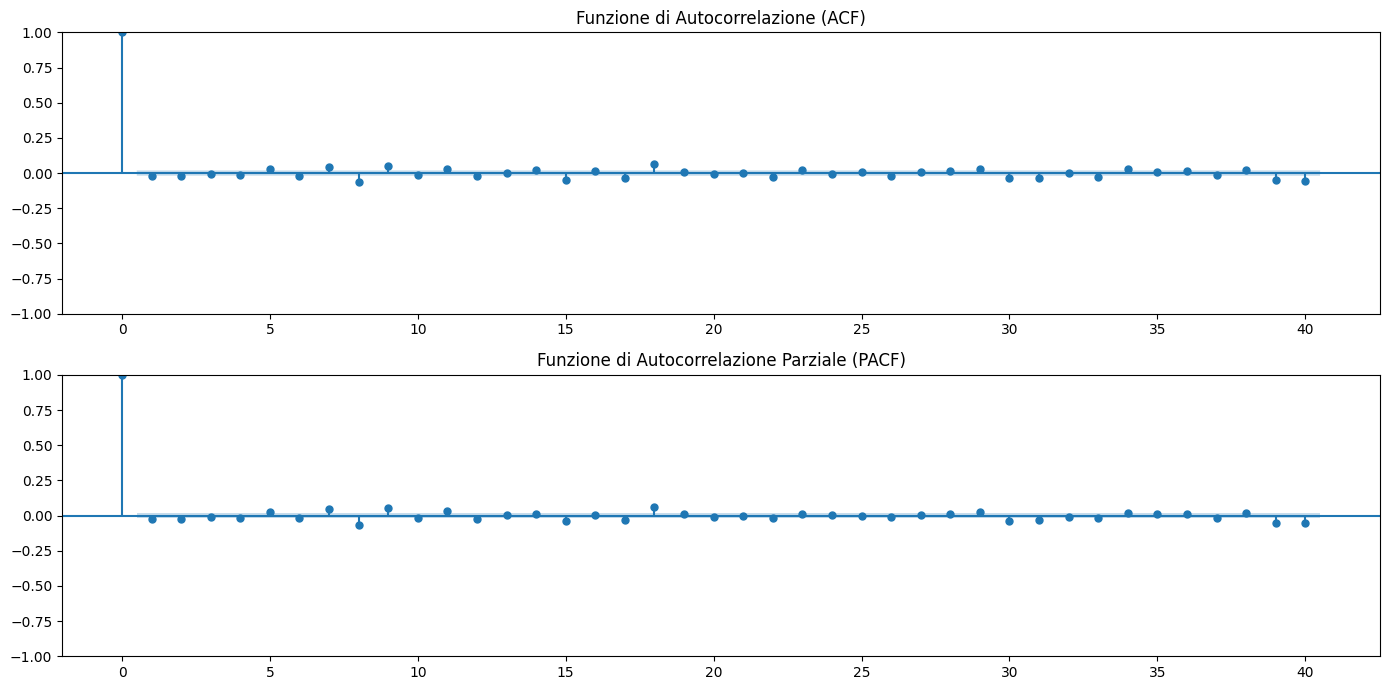

In [63]:
# Seleziona solo la colonna 'Price' (Prezzo di Chiusura)
price_data = df['Price']

# Differenziazione della serie per rendere stazionaria
price_data_diff = price_data.diff().dropna()

# Calcolare e visualizzare ACF e PACF per determinare p e q
plt.figure(figsize=(14, 7))

# Plot della ACF
plt.subplot(2, 1, 1)
plot_acf(price_data_diff, lags=40, ax=plt.gca())
plt.title('Funzione di Autocorrelazione (ACF)')

# Plot della PACF
plt.subplot(2, 1, 2)
plot_pacf(price_data_diff, lags=40, ax=plt.gca())
plt.title('Funzione di Autocorrelazione Parziale (PACF)')

plt.tight_layout()
plt.show()

Utilizzare auto_arima è un ottimo approccio per selezionare automaticamente l’ordine del modello ARIMA, e l’Akaike Information Criterion (AIC) è una metrica molto utile per confrontare modelli con diversi ordini. Ora che hai trovato il modello con (0, 2, 1) come ordine, possiamo procedere con la divisione dei dati in training e test e con la predizione.

1. Divisione dei Dati in Training e Test

	•	Dati di Training: fino al 2021.
	•	Dati di Test: dal 2021 al 2024.

2. Creazione del Modello ARIMA con i Parametri Ottimali (0, 2, 1)

   Una volta identificato l’ordine ottimale del modello, utilizziamo i dati di training per addestrare il modello ARIMA e successivamente fare delle previsioni sui dati di test.

3. Valutazione della Predizione

	•	Confrontiamo le previsioni ottenute con i dati di test per calcolare l’errore e valutare l’efficacia del modello.

/Users/davidedegrazia/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/davidedegrazia/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/davidedegrazia/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/davidedegrazia/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results w

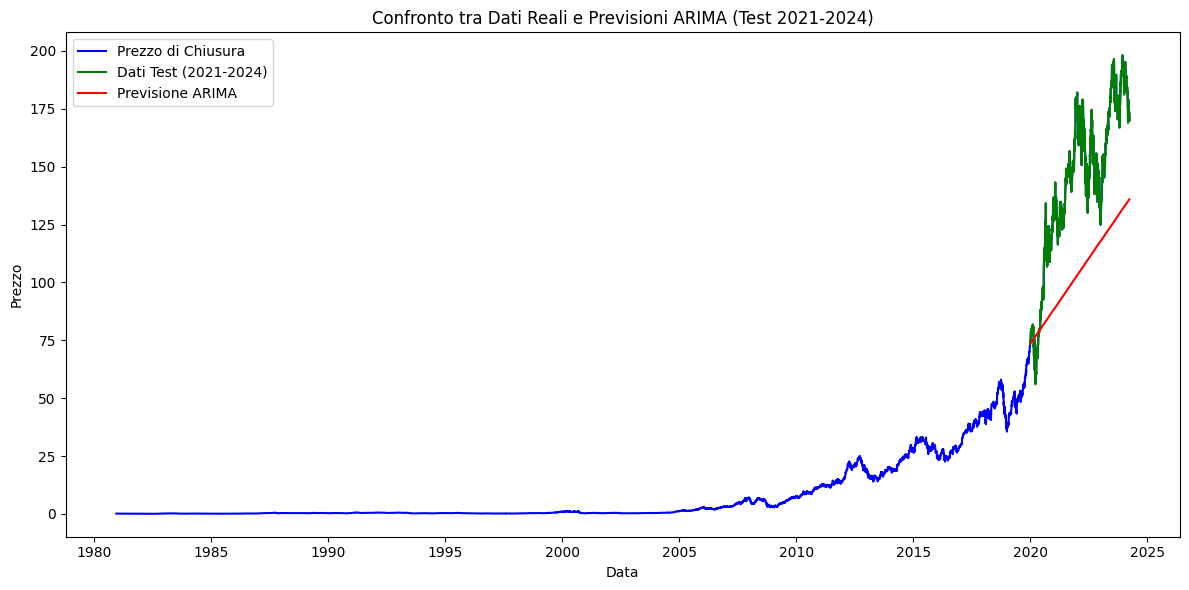

RMSE (Root Mean Squared Error) della previsione: 43.3573


/Users/davidedegrazia/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
from sklearn.metrics import mean_squared_error
# Seleziona solo la colonna 'Price' (Prezzo di Chiusura)
price_data = df['Price']

# Divisione dei dati in training e test
train_data = price_data[:'2019-12-31']  # Dati di training fino al 2020
test_data = price_data['2020-01-01':'2024-12-31']  # Dati di test dal 2021 al 2024

# Creazione del modello ARIMA usando i parametri (0, 2, 1) identificati con auto_arima
model_arima = ARIMA(train_data, order=(0, 2, 1))
model_arima_fit = model_arima.fit()

# Previsione sui dati di test
forecast_steps = len(test_data)
forecast_values = model_arima_fit.forecast(steps=forecast_steps)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))

# Dati storici
plt.plot(price_data.index, price_data, label='Prezzo di Chiusura', color='blue')

# Dati di test e previsione
plt.plot(test_data.index, test_data, label='Dati Test (2021-2024)', color='green')
plt.plot(test_data.index, forecast_values, label='Previsione ARIMA', color='red')

# Aggiungi titolo e etichette
plt.title('Confronto tra Dati Reali e Previsioni ARIMA (Test 2021-2024)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

# Calcolo dell'errore medio quadratico (RMSE) per valutare la previsione
rmse = mean_squared_error(test_data, forecast_values, squared=False)
print(f"RMSE (Root Mean Squared Error) della previsione: {rmse:.4f}")